In [1]:
print('fsfasofnisafa')

fsfasofnisafa


In [2]:
print('MOdle Evalutaion and Refinement')

MOdle Evalutaion and Refinement


In [3]:
# Data Ingestion 
# URL for the data : https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv

In [4]:
# Importing requrired library 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'

df = pd.read_csv(path)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [21]:
df.shape

(201, 31)

In [7]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'symboling', 'normalized-losses', 'make',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['horsepower']]
Y = df['price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.3, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
Yhat = lm.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
r = mean_squared_error(Yhat, y_test)

In [19]:
r

26059506.299481314

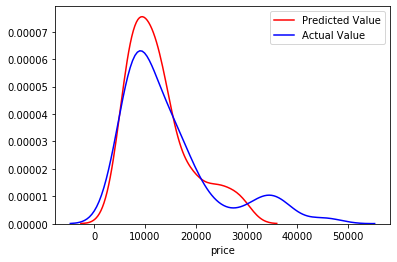

In [20]:
import seaborn as sns
ax = sns.distplot(Yhat,hist = False, color ='r', label = 'Predicted Value')
sns.distplot(y_test, hist = False, color = 'b', label = "Actual Value")

CrossValidation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
r  = cross_val_score(lm, x_train,y_train, cv = 3 )

In [24]:
r

array([0.75592157, 0.50906729, 0.5091236 ])

In [25]:
r.mean()

0.5913708188975614

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
r = cross_val_predict(lm, x_train, y_train, cv =3)

In [29]:
r[0:5]

array([11554.72802321,  9645.80332231,  7259.64744619,  7259.64744619,
        7100.57038778])

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
p = PolynomialFeatures(degree = 3)

In [34]:
xP_train = p.fit_transform(x_train)

In [35]:
xP_test = p.fit_transform(x_test)

In [36]:
lm2 = LinearRegression()

In [38]:
lm2.fit(xP_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
p = lm2.predict(x_test)

In [40]:
from sklearn.linear_model import Ridge

In [41]:
r = Ridge(alpha = 0.1)

In [43]:
r.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
yhat = r.predict(x_test)

In [45]:
yhat[0:10]

array([ 7510.90017571,  7972.77183638, 11359.83068136, 20135.39223425,
       20751.22111516,  9820.2584791 , 13669.18898475,  6279.2424139 ,
       15362.71840724,  7510.90017571])

In [51]:
l1 =[]
l2 = []
li= [0.1,0.2,0.4,0.7,4]

for n in li:
    r = Ridge(alpha = n)
    r.fit(x_train, y_train)
    l1.append(r.score(x_test,y_test))
    l2.append(r.score(x_train, y_train))

In [52]:
l1

[0.6958974903652311,
 0.6958973244287575,
 0.69589699255556,
 0.6958964947451367,
 0.6958910187808498]

In [53]:
l2

[0.5966861062323207,
 0.5966861062317808,
 0.596686106229621,
 0.5966861062236819,
 0.5966861059445561]

In [54]:
#Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameter =  [{'alpha':[0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [57]:
Grid = GridSearchCV(r, parameter, cv = 4)

In [ ]:
Grid.fit(x_train, y_train)